In [80]:
# Data is from: https://ourworldindata.org/co2-emissions

import pandas as pd
!pip install numpy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [81]:
df_fail_safe = pd.read_csv(r'owid-co2-data.csv')

# Sets up fail safe I can revert to in case I mess up the df I am working on
df = df_fail_safe

In [82]:
# Shows there are missing values in the data frame - need to factor this in once I evaluate the data
df.isnull().values.any()

#df.isnull()

True

# Investigate data by looking at USA data

In [83]:
df.head()

df[(df['country'] == 'United States') & (df['year'] == 2019)]

#df.columns

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
48156,United States,2019,USA,334319680.0,NaN,40.896,0.122,5259.144,-117.513,-2.186,...,8.58,17.599,0.035,0.228,0.275,0.011,5771.0,6001.21,433.339,8.24


In [84]:
# Returns list of all countries so can filter data
# df.country.unique()

# Create separate df just for US data
USA = df[df['country'] == 'United States']

In [85]:
# Shows all columns in the dataframe
# df.columns

USA_1990 = USA[USA['year'] > 1990]
#[['country','year','co2_per_capita','ghg_per_capita','nitrous_oxide_per_capita', 'primary_energy_consumption', 'share_global_cumulative_co2', 'share_of_temperature_change_from_ghg']]

In [120]:
USA_1990[['year','share_of_temperature_change_from_ghg']].head(2)

,year,share_of_temperature_change_from_ghg
48128,1991,20.896
48129,1992,20.783


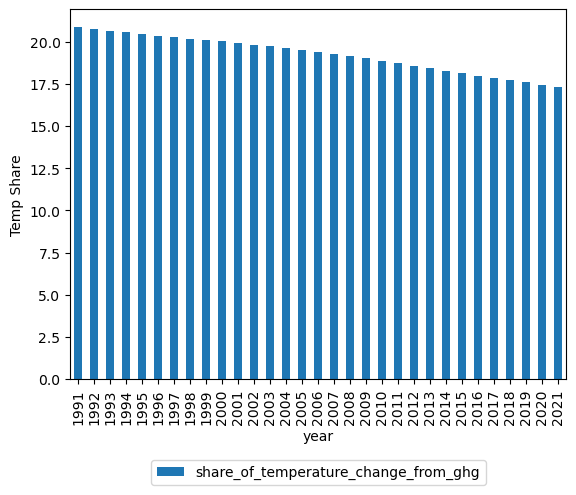

In [87]:
# Overall plot
ax = USA_1990.plot.bar(x='year', y='share_of_temperature_change_from_ghg')

# axis label
plt.ylabel('Temp Share')

# display legend and use anchor and location to ensure it doesn't cover the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
plt.show()

# See which countries have the biggest influence on the share of temp change from ghg

In [88]:
# Objective: See which countries have the biggest influence on the share of temp change from ghg

# To do this I need to get the avg of that column for each country and plot it to see

# Getting the avg
avg_share_temp_change = df.groupby('country')['share_of_temperature_change_from_ghg'].mean().reset_index()

# Replace NaN values with 0 so we can plot
avg_share_temp_change['share_of_temperature_change_from_ghg'] = avg_share_temp_change['share_of_temperature_change_from_ghg'].fillna(0)

avg_share_temp_change

,country,share_of_temperature_change_from_ghg
0,Afghanistan,0.130076
1,Africa,6.600801
2,Africa (GCP),0.000000
3,Aland Islands,0.000000
4,Albania,0.031012
...,...,...
273,Western Sahara,0.000000
274,World,100.000000
275,Yemen,0.025310
276,Zambia,0.218930


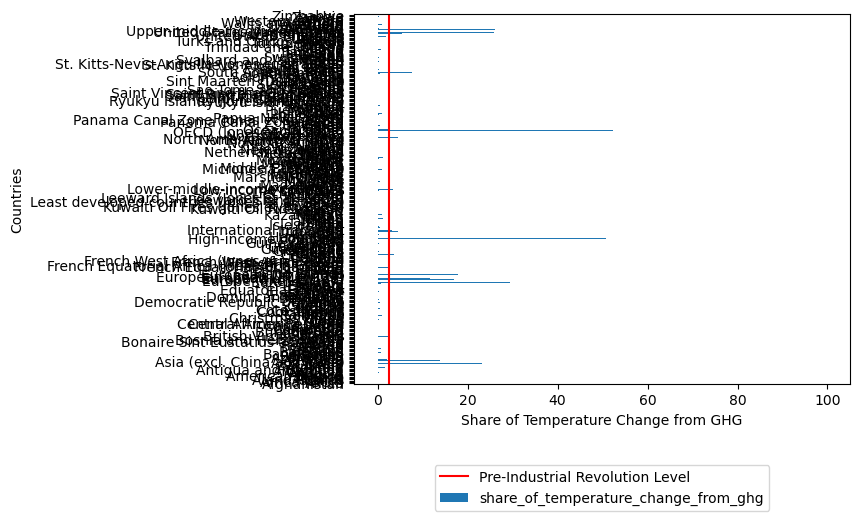

In [89]:
# Overall plot
ax = avg_share_temp_change.plot.barh(y='share_of_temperature_change_from_ghg', x='country')

# axis label
plt.ylabel('Countries')
plt.xlabel('Share of Temperature Change from GHG')

# horizontal red line
plt.axvline(x=2.5, color='red', linestyle='-',label='Pre-Industrial Revolution Level')

# display legend and use anchor and location to ensure it doesn't cover the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
plt.show()

As we can see, the above plot is very hard to read, but we can see that most countries have less than 15% of the share of the temp change from ghg

Let's replot, but filter out anything less than 15%

In [90]:
avg_share_temp_change_above_15 = avg_share_temp_change[avg_share_temp_change['share_of_temperature_change_from_ghg'] > 14.99]

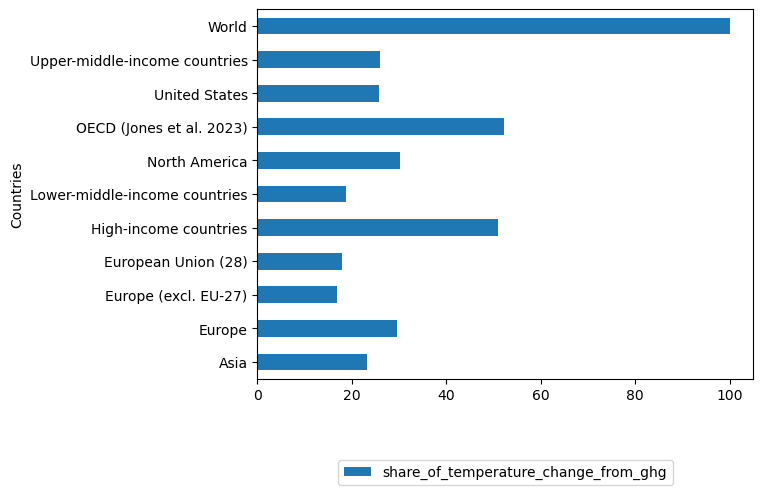

In [91]:
# Overall plot
ax = avg_share_temp_change_above_15.plot.barh(y='share_of_temperature_change_from_ghg', x='country')

# axis label
plt.ylabel('Countries')

# horizontal red line
# plt.axhline(y=280, color='red', linestyle='-',label='Pre-Industrial Revolution Level')

# display legend and use anchor and location to ensure it doesn't cover the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
plt.show()

From the above plot we can see that the US is the only actual country listed where the rest are continents or regions. We need to do more filtering on the data so we can only see the countries that contribute most to temp change

In [92]:
# To do this we need to remove rows from the data that are not countries

# See which values in country are not actually a country

avg_share_temp_change['country'].unique()

# Create new data frame to use

test = avg_share_temp_change.set_index('country')

# Drop values found from unique list

test.drop(
    labels = ["Europe", "World", "Upper-middle-income countries", "OECD (Jones et al. 2023)", "Lower-middle-income countries", "High-income countries", "European Union (28)", "Europe (excl. EU-27)", "Asia",
             'Asia (GCP)', 'Central America (GCP)', 'Europe', 'Europe (GCP)',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (27) (GCP)',
       'European Union (28)', 'French Equatorial Africa (GCP)',
       'French Equatorial Africa (Jones et al. 2023)', 'French Guiana',
       'French Polynesia', 'French West Africa (GCP)',
       'French West Africa (Jones et al. 2023)',
       'International transport',
       'Kuwaiti Oil Fires (GCP)', 'Kuwaiti Oil Fires (Jones et al. 2023)',
       'Least developed countries (Jones et al. 2023)',
       'Leeward Islands (GCP)', 'Leeward Islands (Jones et al. 2023)', 'Non-OECD (GCP)', 
        'North America (GCP)', 'North America (excl. USA)', 'OECD (GCP)', 
        'OECD (Jones et al. 2023)', 'Oceania (GCP)', 
        'Panama Canal Zone (GCP)', 'Panama Canal Zone (Jones et al. 2023)',
        'Ryukyu Islands (GCP)', 'Ryukyu Islands (Jones et al. 2023)', 'Saint Martin (French part)', 
        'Sint Maarten (Dutch part)', 'South America (GCP)', 'St. Kitts-Nevis-Anguilla (GCP)', 
        'St. Kitts-Nevis-Anguilla (Jones et al. 2023)', 'Middle East (GCP)', 'Low-income countries',
        'Oceania','North America', 'Asia (excl. China and India)', 'Africa', 'South America'
        ],
    axis=0,
    inplace=True
)

# Reset index so we can properly plot

test = test.reset_index()

# Once I have this data I want to predict what each country's total ghg will be using ML 

<Figure size 4500x1500 with 0 Axes>

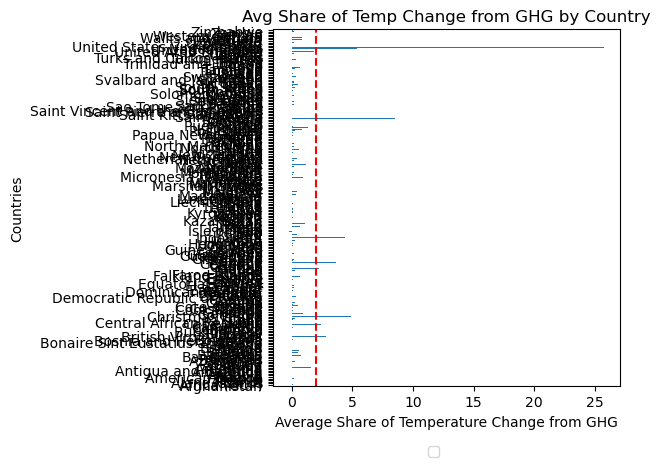

In [93]:
# Replot to see what percent most countries are under 
# Overall plot
plt.figure(figsize=(45, 15))
ax = test.plot.barh(y='share_of_temperature_change_from_ghg', x='country')

# axis label
plt.ylabel('Countries')
plt.xlabel('Average Share of Temperature Change from GHG')
plt.title('Avg Share of Temp Change from GHG by Country')

# vertical red line
plt.axvline(x=2, color='red', linestyle='--')

# display legend and use anchor and location to ensure it doesn't cover the plot
#plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2))
plt.legend(labels=[], loc='upper right', bbox_to_anchor=(0.5,-0.15))

# Adjust layout to avoid cutting off elements
plt.tight_layout()

# Adjust margins
#plt.subplots_adjust(left=0.3, right=0.9)

# Centered title
#plt.suptitle('Average Share of Temperature Change from GHG by Country', fontsize=12, x=0.5, y=1)

plt.savefig('all_countries_temp_share.jpg', format='jpg')

plt.show()

From the above plot we see that most countries are below 2%, let's filter the data again and see which countries are above that value

In [94]:
# Find countries with share > 2
avg_share_temp_change_cleaned = test[test['share_of_temperature_change_from_ghg'] > 2]

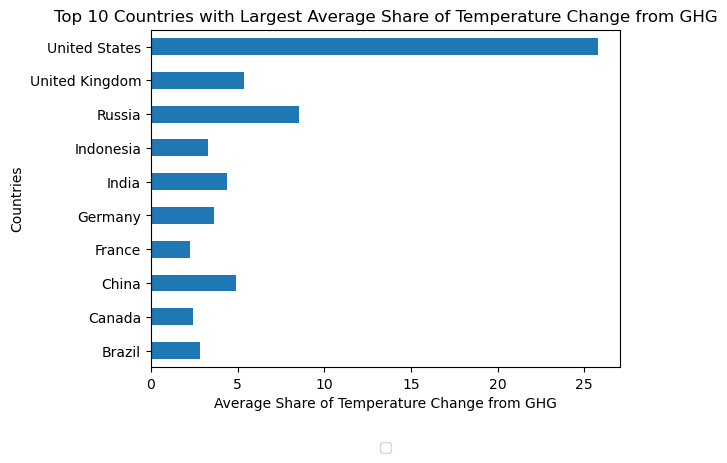

In [95]:
# Replot
# Overall plot
ax = avg_share_temp_change_cleaned.plot.barh(y='share_of_temperature_change_from_ghg', x='country')

# axis label
plt.ylabel('Countries')
plt.xlabel('Average Share of Temperature Change from GHG')
plt.title('Top 10 Countries with Largest Average Share of Temperature Change from GHG')

# horizontal red line
# plt.axhline(y=280, color='red', linestyle='-',label='Pre-Industrial Revolution Level')

# display legend and use anchor and location to ensure it doesn't cover the plot
plt.legend(labels=[], loc='upper center', bbox_to_anchor=(0.5,-0.2))

# Adjust layout to avoid cutting off elements
plt.tight_layout()

plt.savefig('top_10_countries.jpg', format='jpg')

plt.show()

Now we have the top 10 countries that contribute the most to temperature change on average. Let's explore what their emissions are over time

# Top 10 countries emissions over time

In [96]:
# Filter out original df to just our top 10 contributors to temp change
top_10 = df[df["country"].isin(avg_share_temp_change_cleaned['country'].unique())]

# Validate that this was successful 
top_10['country'].unique()

# Filter df to only relevant columns
top_10 = top_10[['year','country','total_ghg']]

# Search to see what the first year is that has data on total ghg - 1990
top_10.iloc[2007]

# Filter data to be after 1990
top_10 = top_10[top_10['year'] > 1989].reset_index()

# From the above dataset we can see some data is missing in the late 2000s, let's see what is missing
validate = top_10[top_10['year'] > 2018]
validate

# Here we see that all countries have data up to 2019 so we need to omit 2020 and 2021 data
top_10 = top_10[(top_10['year'] > 1989) & (top_10['year'] < 2020)].reset_index()

# Validate there is no missing data
for i in range(0, len(top_10['total_ghg'])):
    if top_10['total_ghg'].isnull()[i] == True:
        print("Data is missing at ", i, " location")
        
# Loop doesn't print anything so dataset is complete

# Clean up old index columns
top_10 = top_10.drop(['level_0','index'],axis=1)

# Group data by country for plotting
top_10_grouped = top_10.groupby('country')

#top_10.tail()
#Checking data for 2019 to find units we see that it is in million metric tons: https://www.epa.gov/sites/default/files/2021-04/documents/us-ghg-inventory-1990-2019-data-highlights.pdf

# Our dataset is now ready to work with

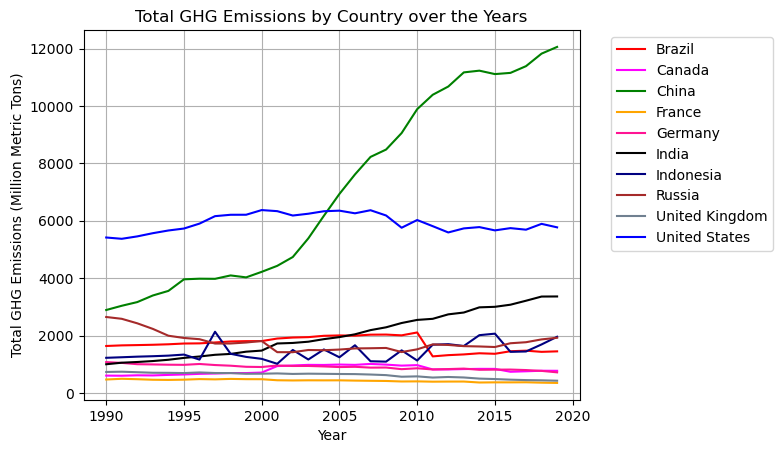

In [97]:
# Let's plot all countires ghg emissions from 1990 to 2019

# Define a list of colors to use for each line (you can add more colors if needed)
colors = ['red', 'magenta', 'green', 'orange', 'deeppink', 'black', 'navy', 'brown', 'slategray', 'blue']

# Loop through each country group and plot its line
    # In each iteration, loop assigns the country name to the variable country and 
    # the corresponding data subset (group) to the variable group
for i, (country, group) in enumerate(top_10_grouped):
    plt.plot(group['year'], group['total_ghg'], label=country, color=colors[i])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions (Million Metric Tons)')
plt.title('Total GHG Emissions by Country over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Add the legend to distinguish the countries

# Step 5: Display the chart
plt.grid(True)  # Add gridlines for better visualization
plt.show()

# Linear Regression Attempt

In [98]:
# Now lets run linear regression analysis to predict future emissions for only the US

from sklearn import linear_model
from sklearn.metrics import r2_score
!pip install numpy
import numpy as np

In [121]:
USA = top_10[top_10['country'] == 'United States']

In [100]:
msk = np.random.rand(len(USA)) < 0.5

train = USA[msk]
test = USA[~msk]

MAE: 309.40
MSE: 109612.38


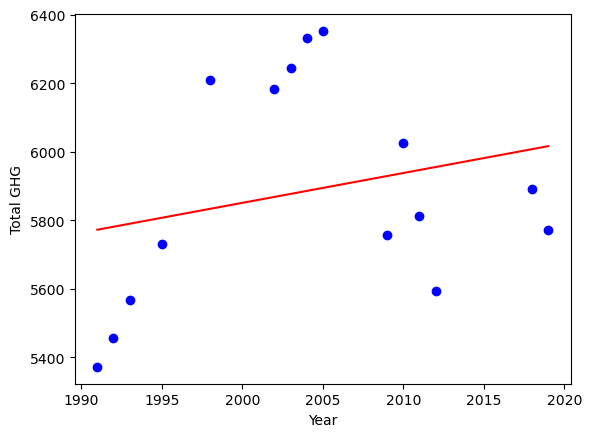

In [101]:
# Linear regression attempt 1

regr = linear_model.LinearRegression()
#lr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['year']])
train_y = np.asanyarray(train[['total_ghg']])

regr.fit(train_x, train_y)

test_x = np.asanyarray(test[['year']])
test_y = np.asanyarray(test[['total_ghg']])
test_y_ = regr.predict(test_x)

plt.scatter(train.year, train.total_ghg, color='blue')

plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Total GHG")

print("MAE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))

From the above plot we can see that the model is too simple and is underfitted to the data. Let's try another method

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

x_data = USA['year'].values.reshape(-1, 1) #independent var reshaped 1D array to 2D array so can do cross_val
y_data = USA['total_ghg'].values.reshape(-1, 1) #dependent / target var reshaped 1D array to 2D array so can do cross_val

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.5, random_state = 0)

scores = cross_val_score(regr, x_data, y_data, cv=5)

yhat = cross_val_predict(regr, x_data, y_data, cv=5)

Rsqu_test = []
order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,50]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    regr.fit(x_train_pr,y_train)
    Rsqu_test.append(regr.score(x_test_pr,y_test))
    
Rsqu_test

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat2 = RidgeModel.predict(x_test)

#yhat2

#print("x", x_data, " ", "y", y_data)

In [103]:
# Good ridge regression walkthrough: https://www.youtube.com/watch?v=c3SkmBZ0HZw
# Trying their method

# This is just to get a base-line for a model without ridge regression
regression = LinearRegression()
regression.fit(x_data, y_data)
first_model = (mean_squared_error(y_true=y_data,y_pred=regression.predict(x_data)))
print(first_model)

96089.37591143396


In [104]:
ridge=Ridge()
search=GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-10,10,40)},
                   scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(x_data, y_data)
search.best_params_
abs(search.best_score_)

117242.0350090347

The score produced is very high, which means linear regression is not going to be a good fit for our dataset. Let's try using polynomial regression instead

# Polynomial Regression - no standardizing data though

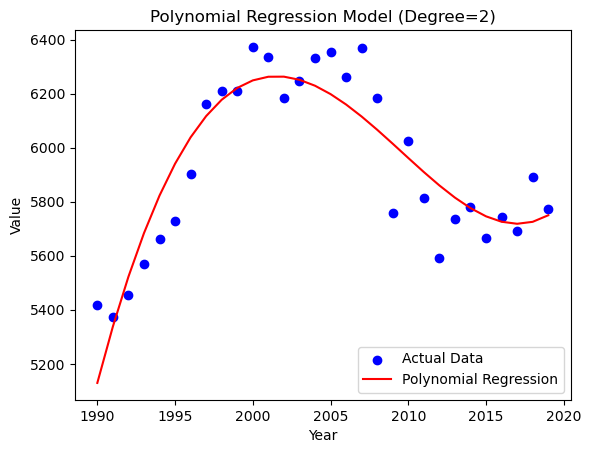

Mean Squared Error (MSE): 17884.82338884958


In [122]:
# Polynomial regression, but no optimization of paramaters 

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Given data
x = np.array(USA['year']).reshape(-1, 1)
y = np.array(USA['total_ghg']).reshape(-1, 1)

# Adding polynomial features
poly = PolynomialFeatures(degree=25)
x_poly = poly.fit_transform(x)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)

# Predict the y values using the model
y_pred = model.predict(x_poly)

# Plot the data and the polynomial regression curve
plt.scatter(x, y, color='b', label='Actual Data')
plt.plot(x, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Polynomial Regression Model (Degree=2)')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)


The MSE without standardizing the data for a polynomial function is very high. Let's try standardizing the data

# Polynomial Regression with Standardized Data for USA

Best degree: 4
Best alpha: 0.1


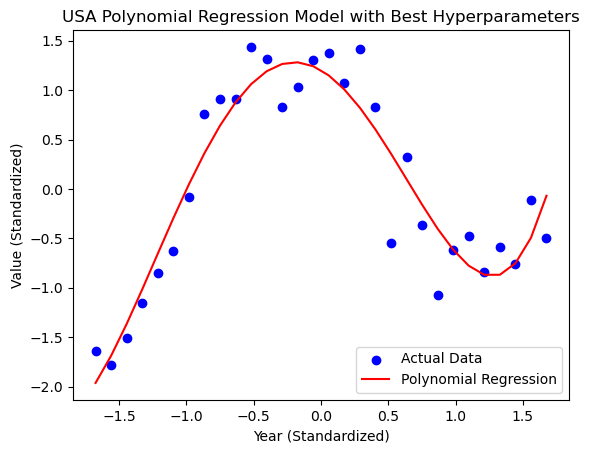

Mean Squared Error (MSE): 0.10975810626867284


In [108]:
# This code works to find optimal parameters to ensure the model is not over or under fit

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Data
x_data = np.array(USA['year']).reshape(-1, 1)
y_data = np.array(USA['total_ghg']).reshape(-1, 1)


# Standardization
    # Transforms the data such that it has a mean of 0 and a standard deviation of 1
    # Formula for standardization: z = (x - mean) / standard deviation
scaler_x = StandardScaler() # This is a StandardScaler object
scaler_y = StandardScaler()

# fit_transform() - combines two operations: fitting and transforming the data
     # fit() - calculates the mean and standard deviation of x_data
     # transform() - subtracts the mean from each data point and then divides by the standard deviation
x_data_standardized = scaler_x.fit_transform(x_data)
y_data_standardized = scaler_y.fit_transform(y_data)

# Create a pipeline with PolynomialFeatures and Ridge
    # Pipeline chains multiple steps of a ML workflow together in a sequence 
# PolynomialFeatures() - raising the existing features to various powers and multiplying them together
    # For example, if you have a feature x, PolynomialFeatures can create new features like x^2, x^3, etc
# Ridge() - linear regression model with L2 regularization 
    # It's used to fit a linear model to the data and penalize large coefficients to prevent overfitting
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Set up the parameter grid for grid search
param_grid = {
    'polynomial_features__degree': [2, 3, 4, 5],  # degrees to try for PolynomialFeatures
    'ridge__alpha': np.logspace(-3, 3, 13)  # alpha values in the range [0.001, 1000] for Ridge
}

# Perform grid search with cross-validation
    # estimator - defines model to be tuned 
    # param_grid - hyperparameter values to be tested 
    # scoring - evaluation metric to be used during cross-validation
        # 'neg_mean_squared_error' is used, which means the grid search will look for hyperparameter combinations 
        # that minimize the mean squared error (MSE)
    # cv - number of cross-validation folds to be used during the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit grid_search object to the standardized data
    # ravel - flattens y_data_standardized to ensure target variable is a 1-D array 
        # rather than a 2-D array with a single column
        # This is done because scikit-learn algorithms expect target var to be a 1-D array
grid_search.fit(x_data_standardized, y_data_standardized.ravel())

# Get the best hyperparameters
best_degree = grid_search.best_params_['polynomial_features__degree'] # best degree value found
best_alpha = grid_search.best_params_['ridge__alpha'] # best alpha value found

print("Best degree:", best_degree)
print("Best alpha:", best_alpha)

# Get the best model from grid search
# best_estimator_ - holds model with the best combo of hyperparameters found (lowest MSE)
best_model = grid_search.best_estimator_

# Predict the y values using the best model
y_pred = best_model.predict(x_data_standardized)

# Plot the data and the polynomial regression curve with the best model
plt.scatter(x_data_standardized, y_data_standardized, color='b', label='Actual Data')
plt.plot(x_data_standardized, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Year (Standardized)')
plt.ylabel('Value (Standardized)')
plt.title('USA Polynomial Regression Model with Best Hyperparameters')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) with the best model
mse = mean_squared_error(y_data_standardized, y_pred) # (actual values, predicted values)

print("Mean Squared Error (MSE):", mse)


Since our MSE is small we can say this model is fairly accurate. Let's make some predictions

In [109]:
# Testing the model to predict 2020 - 2022 data
# Standardize the year 2020 (x=2020)
x_2020 = np.array([[2020,2021,2022]])

for i in range(0,3):

    x_2020_standardized = scaler_x.transform((x_2020[0][i]).reshape(-1, 1))

    # Make the prediction for x=2020
    y_2020_pred_standardized = best_model.predict(x_2020_standardized)

    # Convert the prediction back to the original scale by reshaping the array
    y_2020_pred = scaler_y.inverse_transform(y_2020_pred_standardized.reshape(-1, 1))

    #print(x_2020[0][i])
    print("Predicted value for", x_2020[0][i],"=", y_2020_pred[0, 0])

Predicted value for 2020 = 6098.16119115035
Predicted value for 2021 = 6362.662691942486
Predicted value for 2022 = 6708.098182813498


Let's compare actual 2020 and 2021 USA data from the EPA to see what the percent error is for our predictions

In [110]:
import statistics
from statistics import mean 

# Actual 2020 total US5,981 GHG is 5,981 million metric tons - https://www.epa.gov/climate-indicators/climate-change-indicators-us-greenhouse-gas-emissions#:~:text=In%202020%2C%20U.S.%20greenhouse%20gas,2005%20(see%20Figure%201).
actual_2020_US = 5981
predicted_2020_US = 6098

actual_2021_US = 6340.2 # According to https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks#:~:text=In%202021%2C%20U.S.%20greenhouse%20gas,sequestration%20from%20the%20land%20sector.
predicted_2021_US = 6362.7

# Percent error formula: PE = (|true value – experimental value| \ true value) x 100%
Percent_error_2020 = abs(actual_2020_US - predicted_2020_US) / actual_2020_US * 100
Percent_error_2021 = abs(actual_2021_US - predicted_2021_US) / actual_2021_US * 100
Percent_error_avg = statistics.mean([Percent_error_2020, Percent_error_2021])

Percent_error_avg

1.1555365056441071

We see for the above code that the model predicted unseen data for 2020 and 2021 with only an average 1.2% error. This means the model is good at predicting future data

Now we need to update the data set to include the actual data for 2020 and 2021 to improve the model's accuracy

C:\Users\josep\AppData\Local\Temp\ipykernel_5616\753457692.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  USA = USA.append(new_row, ignore_index=True)
C:\Users\josep\AppData\Local\Temp\ipykernel_5616\753457692.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  USA = USA.append(new_row2, ignore_index=True)


Best degree: 5
Best alpha: 0.1


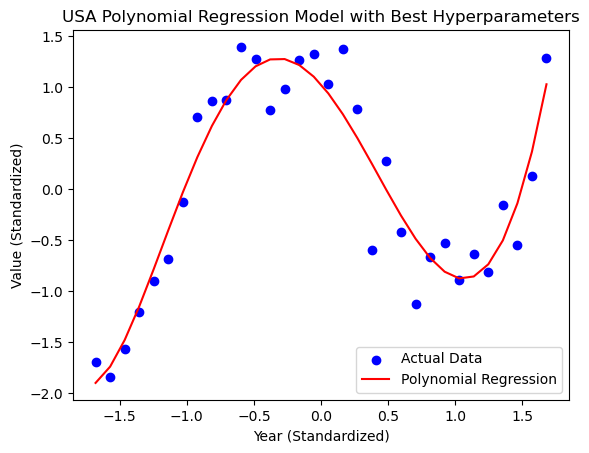

Mean Squared Error (MSE): 0.09827238077927856


In [123]:
# Now we need to update the data set to include the actual data for 2020 and 2021 to improve the model's accuracy
# Once we do this re-run the model again

new_row = {'year': 2020, 'country': 'United States', 'total_ghg': 5981.00}
new_row2 = {'year': 2021, 'country': 'United States', 'total_ghg': 6340.20}

USA = USA.append(new_row, ignore_index=True)
USA = USA.append(new_row2, ignore_index=True)
#USA

# Rerun the same model as above: 
# Data
x_data = np.array(USA['year']).reshape(-1, 1)
y_data = np.array(USA['total_ghg']).reshape(-1, 1)


# Standardization
    # Transforms the data such that it has a mean of 0 and a standard deviation of 1
    # Formula for standardization: z = (x - mean) / standard deviation
scaler_x = StandardScaler() # This is a StandardScaler object
scaler_y = StandardScaler()

# fit_transform() - combines two operations: fitting and transforming the data
     # fit() - calculates the mean and standard deviation of x_data
     # transform() - subtracts the mean from each data point and then divides by the standard deviation
x_data_standardized = scaler_x.fit_transform(x_data)
y_data_standardized = scaler_y.fit_transform(y_data)

# Create a pipeline with PolynomialFeatures and Ridge
    # Pipeline chains multiple steps of a ML workflow together in a sequence 
# PolynomialFeatures() - raising the existing features to various powers and multiplying them together
    # For example, if you have a feature x, PolynomialFeatures can create new features like x^2, x^3, etc
# Ridge() - linear regression model with L2 regularization 
    # It's used to fit a linear model to the data and penalize large coefficients to prevent overfitting
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Set up the parameter grid for grid search
param_grid = {
    'polynomial_features__degree': [2, 3, 4, 5],  # degrees to try for PolynomialFeatures
    'ridge__alpha': np.logspace(-3, 3, 13)  # alpha values in the range [0.001, 1000] for Ridge
}

# Perform grid search with cross-validation
    # estimator - defines model to be tuned 
    # param_grid - hyperparameter values to be tested 
    # scoring - evaluation metric to be used during cross-validation
        # 'neg_mean_squared_error' is used, which means the grid search will look for hyperparameter combinations 
        # that minimize the mean squared error (MSE)
    # cv - number of cross-validation folds to be used during the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit grid_search object to the standardized data
    # ravel - flattens y_data_standardized to ensure target variable is a 1-D array 
        # rather than a 2-D array with a single column
        # This is done because scikit-learn algorithms expect target var to be a 1-D array
grid_search.fit(x_data_standardized, y_data_standardized.ravel())

# Get the best hyperparameters
best_degree = grid_search.best_params_['polynomial_features__degree'] # best degree value found
best_alpha = grid_search.best_params_['ridge__alpha'] # best alpha value found

print("Best degree:", best_degree)
print("Best alpha:", best_alpha)

# Get the best model from grid search
# best_estimator_ - holds model with the best combo of hyperparameters found (lowest MSE)
best_model = grid_search.best_estimator_

# Predict the y values using the best model
y_pred = best_model.predict(x_data_standardized)

# Plot the data and the polynomial regression curve with the best model
plt.scatter(x_data_standardized, y_data_standardized, color='b', label='Actual Data')
plt.plot(x_data_standardized, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Year (Standardized)')
plt.ylabel('Value (Standardized)')
plt.title('USA Polynomial Regression Model with Best Hyperparameters')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) with the best model
mse = mean_squared_error(y_data_standardized, y_pred) # (actual values, predicted values)

print("Mean Squared Error (MSE):", mse)


Use the updated model to make predictions

In [112]:
# Predicting 2022 - 2025 data
# Standardize the year 2020 (x=2020)
x_2020 = np.array([[2022,2023,2024,2025]])

for i in range(0,4):

    x_2020_standardized = scaler_x.transform((x_2020[0][i]).reshape(-1, 1))

    # Make the prediction for x=2020
    y_2020_pred_standardized = best_model.predict(x_2020_standardized)

    # Convert the prediction back to the original scale by reshaping the array
    y_2020_pred = scaler_y.inverse_transform(y_2020_pred_standardized.reshape(-1, 1))

    print(x_2020[0][i])
    print("Predicted value for", x_2020[0][i],"=", y_2020_pred[0, 0])

2022
Predicted value for 2022 = 6515.066881094098
2023
Predicted value for 2023 = 6825.188457455152
2024
Predicted value for 2024 = 7192.112421927573
2025
Predicted value for 2025 = 7617.738025601311


# China Predictions

Best degree: 5
Best alpha: 0.03162277660168379


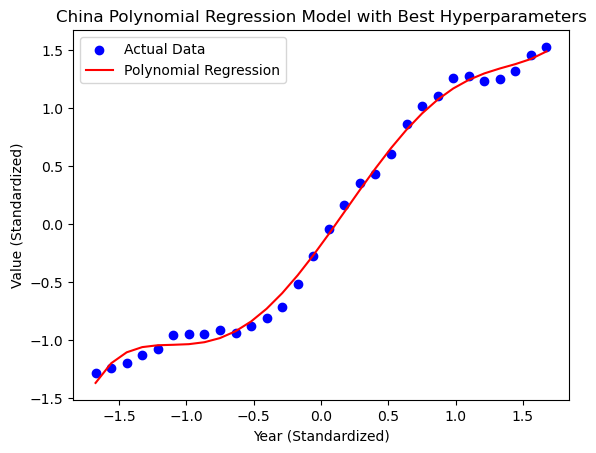

Mean Squared Error (MSE): 0.004112174716902193


In [124]:
# Now let's make some predictions for China using the same code as above to find the optimal model

China = top_10[top_10['country'] == 'China']

# Rerun the same model as above: 
# Data
x_data = np.array(China['year']).reshape(-1, 1)
y_data = np.array(China['total_ghg']).reshape(-1, 1)


# Standardization
    # Transforms the data such that it has a mean of 0 and a standard deviation of 1
    # Formula for standardization: z = (x - mean) / standard deviation
scaler_x = StandardScaler() # This is a StandardScaler object
scaler_y = StandardScaler()

# fit_transform() - combines two operations: fitting and transforming the data
     # fit() - calculates the mean and standard deviation of x_data
     # transform() - subtracts the mean from each data point and then divides by the standard deviation
x_data_standardized = scaler_x.fit_transform(x_data)
y_data_standardized = scaler_y.fit_transform(y_data)

# Create a pipeline with PolynomialFeatures and Ridge
    # Pipeline chains multiple steps of a ML workflow together in a sequence 
# PolynomialFeatures() - raising the existing features to various powers and multiplying them together
    # For example, if you have a feature x, PolynomialFeatures can create new features like x^2, x^3, etc
# Ridge() - linear regression model with L2 regularization 
    # It's used to fit a linear model to the data and penalize large coefficients to prevent overfitting
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Set up the parameter grid for grid search
param_grid = {
    'polynomial_features__degree': [2, 3, 4, 5],  # degrees to try for PolynomialFeatures
    'ridge__alpha': np.logspace(-3, 3, 13)  # alpha values in the range [0.001, 1000] for Ridge
}

# Perform grid search with cross-validation
    # estimator - defines model to be tuned 
    # param_grid - hyperparameter values to be tested 
    # scoring - evaluation metric to be used during cross-validation
        # 'neg_mean_squared_error' is used, which means the grid search will look for hyperparameter combinations 
        # that minimize the mean squared error (MSE)
    # cv - number of cross-validation folds to be used during the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit grid_search object to the standardized data
    # ravel - flattens y_data_standardized to ensure target variable is a 1-D array 
        # rather than a 2-D array with a single column
        # This is done because scikit-learn algorithms expect target var to be a 1-D array
grid_search.fit(x_data_standardized, y_data_standardized.ravel())

# Get the best hyperparameters
best_degree = grid_search.best_params_['polynomial_features__degree'] # best degree value found
best_alpha = grid_search.best_params_['ridge__alpha'] # best alpha value found

print("Best degree:", best_degree)
print("Best alpha:", best_alpha)

# Get the best model from grid search
# best_estimator_ - holds model with the best combo of hyperparameters found (lowest MSE)
best_model = grid_search.best_estimator_

# Predict the y values using the best model
y_pred = best_model.predict(x_data_standardized)

# Plot the data and the polynomial regression curve with the best model
plt.scatter(x_data_standardized, y_data_standardized, color='b', label='Actual Data')
plt.plot(x_data_standardized, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Year (Standardized)')
plt.ylabel('Value (Standardized)')
plt.title('China Polynomial Regression Model with Best Hyperparameters')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) with the best model
mse = mean_squared_error(y_data_standardized, y_pred) # (actual values, predicted values)

print("Mean Squared Error (MSE):", mse)

In [125]:
# Predicting 2022 - 2025 data
# Standardize the year 2020 (x=2020)
x_2020 = np.array([[2020,2021,2022,2023,2024,2025]])

for i in range(0,6):

    x_2020_standardized = scaler_x.transform((x_2020[0][i]).reshape(-1, 1))

    # Make the prediction for x=2020
    y_2020_pred_standardized = best_model.predict(x_2020_standardized)

    # Convert the prediction back to the original scale by reshaping the array
    y_2020_pred = scaler_y.inverse_transform(y_2020_pred_standardized.reshape(-1, 1))

    print(x_2020[0][i])
    print("Predicted value for", x_2020[0][i],"=", y_2020_pred[0, 0])

2020
Predicted value for 2020 = 12269.508827011105
2021
Predicted value for 2021 = 12811.227087017225
2022
Predicted value for 2022 = 13640.249207014424
2023
Predicted value for 2023 = 14857.812790001606
2024
Predicted value for 2024 = 16580.96474323195
2025
Predicted value for 2025 = 18943.538001092566


# India Predictions

Best degree: 4
Best alpha: 0.01


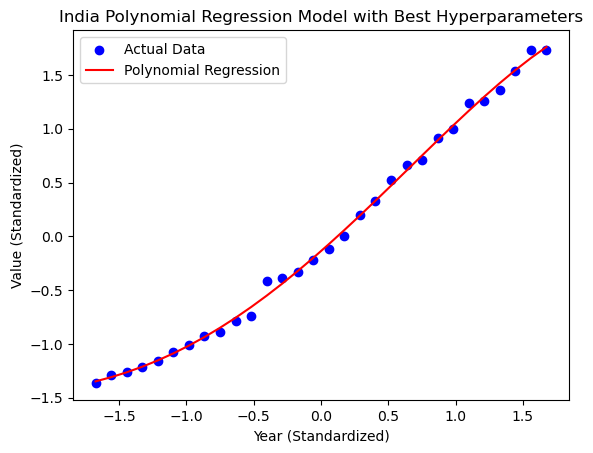

Mean Squared Error (MSE): 0.0020906677107185175


In [126]:
# Now let's make some predictions for India

India = top_10[top_10['country'] == 'India']

# Rerun the same model as above: 
# Data
x_data = np.array(India['year']).reshape(-1, 1)
y_data = np.array(India['total_ghg']).reshape(-1, 1)


# Standardization
    # Transforms the data such that it has a mean of 0 and a standard deviation of 1
    # Formula for standardization: z = (x - mean) / standard deviation
scaler_x = StandardScaler() # This is a StandardScaler object
scaler_y = StandardScaler()

# fit_transform() - combines two operations: fitting and transforming the data
     # fit() - calculates the mean and standard deviation of x_data
     # transform() - subtracts the mean from each data point and then divides by the standard deviation
x_data_standardized = scaler_x.fit_transform(x_data)
y_data_standardized = scaler_y.fit_transform(y_data)

# Create a pipeline with PolynomialFeatures and Ridge
    # Pipeline chains multiple steps of a ML workflow together in a sequence 
# PolynomialFeatures() - raising the existing features to various powers and multiplying them together
    # For example, if you have a feature x, PolynomialFeatures can create new features like x^2, x^3, etc
# Ridge() - linear regression model with L2 regularization 
    # It's used to fit a linear model to the data and penalize large coefficients to prevent overfitting
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Set up the parameter grid for grid search
param_grid = {
    'polynomial_features__degree': [2, 3, 4, 5],  # degrees to try for PolynomialFeatures
    'ridge__alpha': np.logspace(-3, 3, 13)  # alpha values in the range [0.001, 1000] for Ridge
}

# Perform grid search with cross-validation
    # estimator - defines model to be tuned 
    # param_grid - hyperparameter values to be tested 
    # scoring - evaluation metric to be used during cross-validation
        # 'neg_mean_squared_error' is used, which means the grid search will look for hyperparameter combinations 
        # that minimize the mean squared error (MSE)
    # cv - number of cross-validation folds to be used during the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit grid_search object to the standardized data
    # ravel - flattens y_data_standardized to ensure target variable is a 1-D array 
        # rather than a 2-D array with a single column
        # This is done because scikit-learn algorithms expect target var to be a 1-D array
grid_search.fit(x_data_standardized, y_data_standardized.ravel())

# Get the best hyperparameters
best_degree = grid_search.best_params_['polynomial_features__degree'] # best degree value found
best_alpha = grid_search.best_params_['ridge__alpha'] # best alpha value found

print("Best degree:", best_degree)
print("Best alpha:", best_alpha)

# Get the best model from grid search
# best_estimator_ - holds model with the best combo of hyperparameters found (lowest MSE)
best_model = grid_search.best_estimator_

# Predict the y values using the best model
y_pred = best_model.predict(x_data_standardized)

# Plot the data and the polynomial regression curve with the best model
plt.scatter(x_data_standardized, y_data_standardized, color='b', label='Actual Data')
plt.plot(x_data_standardized, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('Year (Standardized)')
plt.ylabel('Value (Standardized)')
plt.title('India Polynomial Regression Model with Best Hyperparameters')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) with the best model
mse = mean_squared_error(y_data_standardized, y_pred) # (actual values, predicted values)

print("Mean Squared Error (MSE):", mse)

In [116]:
# Predicting 2022 - 2025 data
# Standardize the year 2020 (x=2020)
x_2020 = np.array([[2020,2021,2022,2023,2024,2025]])

for i in range(0,6):

    x_2020_standardized = scaler_x.transform((x_2020[0][i]).reshape(-1, 1))

    # Make the prediction for x=2020
    y_2020_pred_standardized = best_model.predict(x_2020_standardized)

    # Convert the prediction back to the original scale by reshaping the array
    y_2020_pred = scaler_y.inverse_transform(y_2020_pred_standardized.reshape(-1, 1))

    print(x_2020[0][i])
    print("Predicted value for", x_2020[0][i],"=", y_2020_pred[0, 0])

2020
Predicted value for 2020 = 3454.1282625011654
2021
Predicted value for 2021 = 3515.3615500973765
2022
Predicted value for 2022 = 3566.074883078507
2023
Predicted value for 2023 = 3605.000419218528
2024
Predicted value for 2024 = 3630.821431206661
2025
Predicted value for 2025 = 3642.1723066473846


Now that we have our predictions let's add them back to each country's dataframe so we can plot them

# Plotting Predictions

In [117]:
# Add in the predictions

new_rows_China = [
                {'year': 2020, 'country': 'China', 'total_ghg': 12269.51},
                {'year': 2021, 'country': 'China', 'total_ghg': 12811.23},
                {'year': 2022, 'country': 'China', 'total_ghg': 13640.25},
                {'year': 2023, 'country': 'China', 'total_ghg': 14857.81},
                {'year': 2024, 'country': 'China', 'total_ghg': 16580.96},
                {'year': 2025, 'country': 'China', 'total_ghg': 18943.54},
                ]

new_rows_China = pd.DataFrame(new_row_China)

China = China.append(new_rows_China, ignore_index=True)

# USA
new_rows_USA = [
                {'year': 2022, 'country': 'United States', 'total_ghg': 6515.07},
                {'year': 2023, 'country': 'United States', 'total_ghg': 6825.19},
                {'year': 2024, 'country': 'United States', 'total_ghg': 7192.11},
                {'year': 2025, 'country': 'United States', 'total_ghg': 7617.74},
                ]

USA = USA.append(new_rows_USA, ignore_index=True)

# India
new_rows_India = [
                {'year': 2020, 'country': 'India', 'total_ghg': 3454.13},
                {'year': 2021, 'country': 'India', 'total_ghg': 3515.36},
                {'year': 2022, 'country': 'India', 'total_ghg': 3566.07},
                {'year': 2023, 'country': 'India', 'total_ghg': 3605.00},
                {'year': 2024, 'country': 'India', 'total_ghg': 3630.82},
                {'year': 2025, 'country': 'India', 'total_ghg': 3642.17},
                ]

India = India.append(new_rows_India, ignore_index=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_5616\3589157804.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  China = China.append(new_rows_China, ignore_index=True)
C:\Users\josep\AppData\Local\Temp\ipykernel_5616\3589157804.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  USA = USA.append(new_rows_USA, ignore_index=True)
C:\Users\josep\AppData\Local\Temp\ipykernel_5616\3589157804.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  India = India.append(new_rows_India, ignore_index=True)


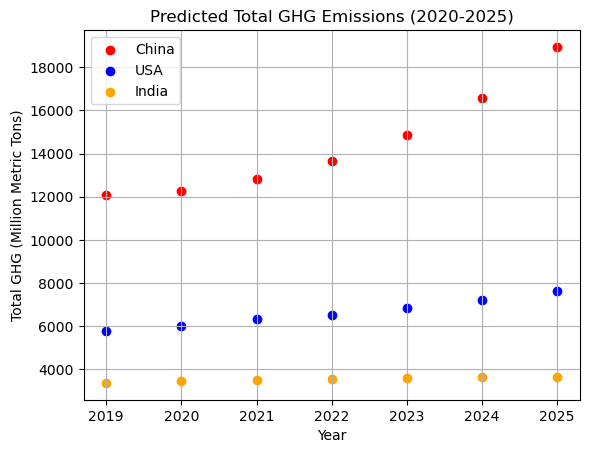

In [118]:
# Let's plot all countires ghg emissions from 2019 - 2025

# Define a list of colors to use for each line
colors = ['red', 'blue', 'orange']

# List of countries to plot
df_list = ['China', 'USA', 'India']
    
# Iterate through the list of DataFrame names
for df_name, color in zip(df_list,colors):
    # Access the DataFrame using its name
    df = globals()[df_name]  # Assuming the DataFrame is in the global scope
    
    # Filter the DataFrame for years 2019 to 2025
    filtered_df = df[df['year'].between(2019, 2025)]
    
    # Create the plot
    plt.scatter(filtered_df['year'], filtered_df['total_ghg'], label=df_name, color=color)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total GHG (Million Metric Tons)')
plt.title('Predicted Total GHG Emissions (2020-2025)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Now we have all the data we need!